# Predicting salaries differences

Import the data salary.csv to a Jupyter Notebook and answer the following questions:

In [146]:
import pandas as pd
import numpy as np                     
import seaborn as sns                  
import matplotlib.pyplot as plt     
%matplotlib inline
from scipy.stats import stats
from scipy.stats.stats import pearsonr

In [147]:
df = pd.read_csv('salary.csv')

## Question 1

**How many responders are there? Are there any missing values in any of the variables**

In [159]:
missing_vals = df['salary'].isna().sum()
responders = len(df) - missing_vals

print('There are ' + str(responders) + ' responders and  ' + str(missing_vals) + ' missings value')
df.drop(208, inplace=True)

There are 513 responders and  1 missings value


**What is the lowest salary and highest salary in the group?**

In [149]:
min_val = df['salary'].min()
max_val = df['salary'].max()

print('The lowest salary is ' + str(min_val) + ' and the highest salary is ' + str(max_val))

The lowest salary is 29000.0 and the highest salary is 96156.0


**What is the mean salary for the sample? Include the standard error of the mean.**

In [150]:
mean_salary =  df['salary'].mean()
standard_error = df['salary'].sem()

print("Mean Salary = " + str(mean_salary))
print("Standard Error of Mean = " + str(standard_error))

Mean Salary = 50863.22009783626
Standard Error of Mean = 560.0622753925232


**What is the standard deviation for the years worked?**

In [125]:
standard_deviation = np.std(df['yearsworked'])

print('Standard deviation = ' + str(standard_deviation))

Standard deviation = 9.435503224576884


**What is the median salary for the sample?**

In [151]:
salary_median = df['salary'].median()

print('Median Salary = ' + str(salary_median))

Median Salary = 50096.0


**What is the interquartile range for salary in the sample?**

In [160]:
salary_iqr = stats.iqr(df['salary'])

print('The salary IQR is ' +str(salary_iqr))

The salary IQR is 20345.0


**How many men are there in the sample? How many women are there in the sample? Present this information in a table.**

In [153]:
df['male'] =  df['male'].map({0: 'female', 1: 'male'})
df.groupby(['male']).count()

,salary,exprior,yearsworked,yearsrank,market,degree,otherqual,position,Field,yearsabs
male,,,,,,,,,,
female,128,128,128,128,128,128,128,128,128,128
male,385,386,386,386,386,386,386,386,386,386


**How many women are executives compared to men?**

In [154]:
women = len(df[(df['male'] == 'female') & (df['position'] == 3)])
men = len(df[(df['male'] == 'male') & (df['position'] == 3)])


print('There are  ' + str(women) + ' women executives and ' + str(men) + ' men executives')

There are  19 women executives and 192 men executives


**Create a histogram for the variable Salary.**

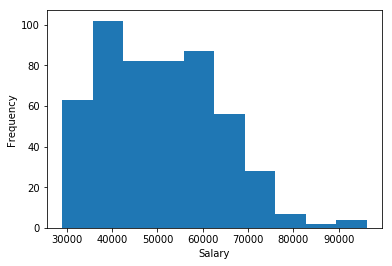

In [155]:
df['salary'].plot(kind = 'hist')
plt.xlabel('Salary')
plt.show()

**Examine the histogram and describe the distribution for Salary.**

The distribution of the histogram is right-skewed.

**Create a bar graph to show the different average salaries of men and women. (Bonus: Add error bars to the bars showing the 95% confidence interval). What does the graph tell you about the difference between men and women’s salaries?**

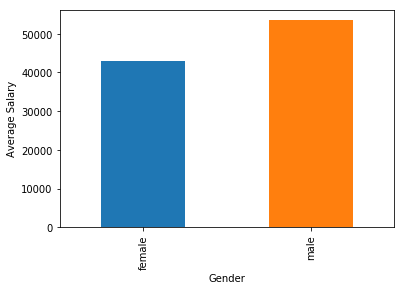

In [156]:
meansalary = df.groupby('male').mean()
avg_salary['salary'].plot(kind = 'bar')
plt.ylabel('Average Salary')
plt.xlabel('Gender')
plt.show()

**Create a scatterplot showing the relationship between Years Worked and Salary. What is the relationship between Years Worked and Salary?**

[Text(0, 0.5, 'Salary'), Text(0.5, 0, 'Years Worked')]

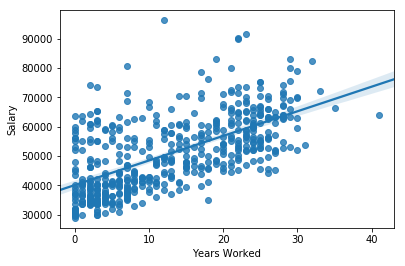

In [157]:
ax = sns.regplot(df['yearsworked'], df['salary'])
ax.set(xlabel='Years Worked', ylabel='Salary')

**Describe any patterns in the scatterplot. Do you notice any unusual/extreme values that do not fit the general trend? If you see any unusual values, briefly describe them (Who are they? In what way are they different?)**

The scatter plot generally shows a positive relationship between years worked and salary. There are some outliers that do not fit with  the general trend where some employees get more salaries with less years associated with the salary

**Using the pearsonr function from the scipy.stats package, calculate the Pearson correlation coefficient (and its corresponding p value) to determine the nature of the relationship between Years Worked and Salary. See help(pearsonr) for help on this function.**

In [161]:
cc = pearsonr(df['yearsworked'], df['salary'])
print(cc)

(0.6235888657598045, 1.2873351342921916e-56)


**Interpret the size and direction of the correlation statistic**

A value of 0.6 implies a moderately positive relationship

**Is the relationship statistically significant? Report the appropriate statistic(s) to support your answer.**

The relatioship is statistically not significant. The higer the p-value, the more isignificant the relationsip becomes. 1.2 is a singnificantly high p-value, hence rendering the relationship insignificant